In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [25]:
!pip install rasterio

In [26]:
!pip install fiona


In [27]:
import rasterio
import fiona
import rasterio.mask

In [53]:
in_goejson = r"/content/data/municipality.json"
in_shp = r"/content/data/municipality.shp"

In [29]:
gdf = gpd.read_file(in_goejson)

In [30]:
gdf.head()

OBJECTID   DISTRICT        GaPa_NaPa     Type_GN Province  SCode  DCode  \
0         1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1      1      1   
1         2  TAPLEJUNG       Maiwakhola  Gaunpalika        1      1      1   
2         3  TAPLEJUNG        Meringden  Gaunpalika        1      1      1   
3         4  TAPLEJUNG       Mikwakhola  Gaunpalika        1      1      1   
4         5  TAPLEJUNG     Phaktanglung  Gaunpalika        1      1      1   

   SDD  MCode      length         area  SDDMM          Nepali  Shape_Leng  \
0  101      1   44.672747    88.825948  10101  आठराई त्रिवेणी    0.430900   
1  101      2   61.067429   137.848122  10102        मैवाखोला    0.577692   
2  101      3   75.987469   210.313039  10103        मेरिङदेन    0.718499   
3  101      4  123.175400   442.960328  10104      मिक्वाखोला    1.164097   
4  101      5  228.107830  1858.441119  10105       फक्ताङलुङ    2.186142   

   Shape_Area                                           geometry  
0    0.008075  POLYGON ((87.62191 27.36245, 87.62137 27.36272...  
1    0.012540  POLYGON ((87.60599 27.37125, 87.60364 27.37219...  
2    0.019148  POLYGON ((87.62728 27.37689, 87.62691 27.37773...  
3    0.040365  POLYGON ((87.68465 27.40857, 87.67857 27.40784...  
4    0.169452  POLYGON ((88.14827 27.70202, 88.14733 27.70302...

In [31]:
len(gdf)

774

In [32]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
gdf.describe()

OBJECTID       SCode       DCode         SDD       MCode      length  \
count  774.000000  774.000000  774.000000  774.000000  774.000000  774.000000   
mean   387.500000    3.651163   36.815245  401.931525    8.436693   75.003037   
std    223.578845    2.003171   22.049591  221.431259   14.796262   39.779379   
min      1.000000    1.000000    1.000000  101.000000    1.000000   11.054486   
25%    194.250000    2.000000   18.000000  218.000000    3.000000   50.898941   
50%    387.500000    3.000000   34.000000  331.000000    6.000000   65.753944   
75%    580.750000    5.000000   56.000000  556.000000    9.000000   85.351253   
max    774.000000    7.000000   77.000000  775.000000   99.000000  310.307817   

              area         SDDMM  Shape_Leng  Shape_Area  
count   774.000000    774.000000  774.000000  774.000000  
mean    191.401939  40201.589147    0.720249    0.017588  
std     253.638512  22143.022630    0.384657    0.023483  
min       1.336874  10101.000000    0.104763    0.000122  
25%      76.867367  21801.250000    0.488571    0.006980  
50%     123.171074  33105.500000    0.631270    0.011326  
75%     199.828511  55609.750000    0.820321    0.018407  
max    2453.885882  77509.000000    3.004550    0.228039

In [34]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    774 non-null    int32   
 1   DISTRICT    774 non-null    object  
 2   GaPa_NaPa   774 non-null    object  
 3   Type_GN     774 non-null    object  
 4   Province    774 non-null    object  
 5   SCode       774 non-null    int32   
 6   DCode       774 non-null    int32   
 7   SDD         774 non-null    int32   
 8   MCode       774 non-null    int32   
 9   length      774 non-null    float64 
 10  area        774 non-null    float64 
 11  SDDMM       774 non-null    int32   
 12  Nepali      774 non-null    object  
 13  Shape_Leng  774 non-null    float64 
 14  Shape_Area  774 non-null    float64 
 15  geometry    774 non-null    geometry
dtypes: float64(4), geometry(1), int32(6), object(5)
memory usage: 78.7+ KB


<Axes: >

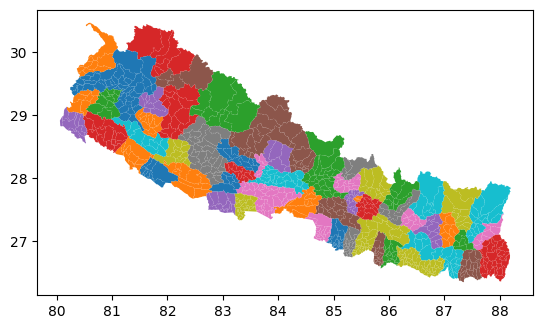

In [35]:
#visualization of data
gdf.plot("DISTRICT")

<Axes: >

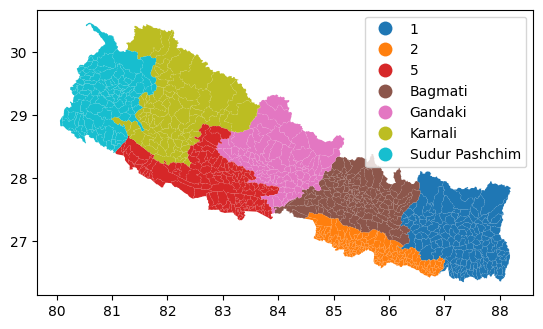

In [36]:
gdf.plot("Province", legend = True)

In [37]:
in_img = r'/content/geotiff_data/nepal_lc_2020.tif'
ds = rasterio.open(in_img)
ds

data = ds.read()
data

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]], dtype=uint8)

In [38]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': 255.0,
 'width': 2932,
 'height': 1485,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0027777777777780012, 0.0, 80.05847091000004,
        0.0, -0.0027777777777780012, 30.472819010000357)}

In [39]:
ds.shape

(1485, 2932)

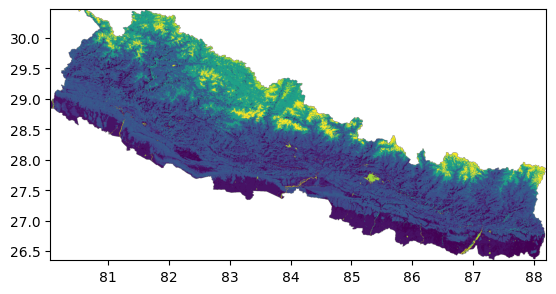

<Axes: >

In [40]:
from rasterio.plot import show, show_hist

show(ds)

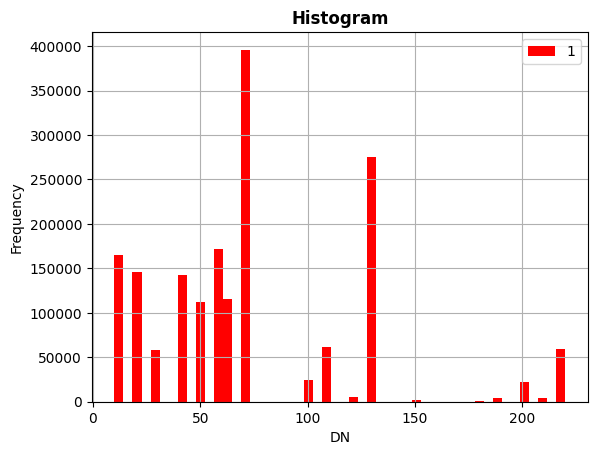

In [41]:
show_hist(ds, bins=50)

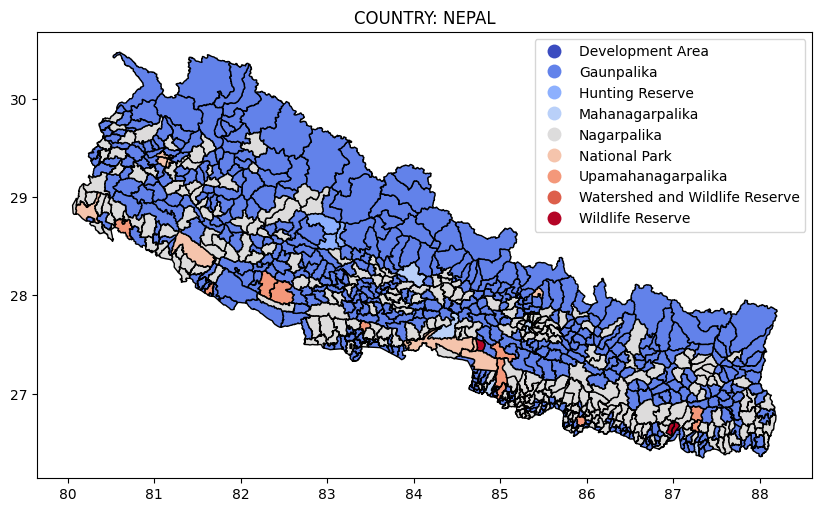

In [42]:
gdf.plot(column="Type_GN", cmap="coolwarm", legend=True, edgecolor="black", figsize=(10,6))
plt.title("COUNTRY: NEPAL")
plt.show()

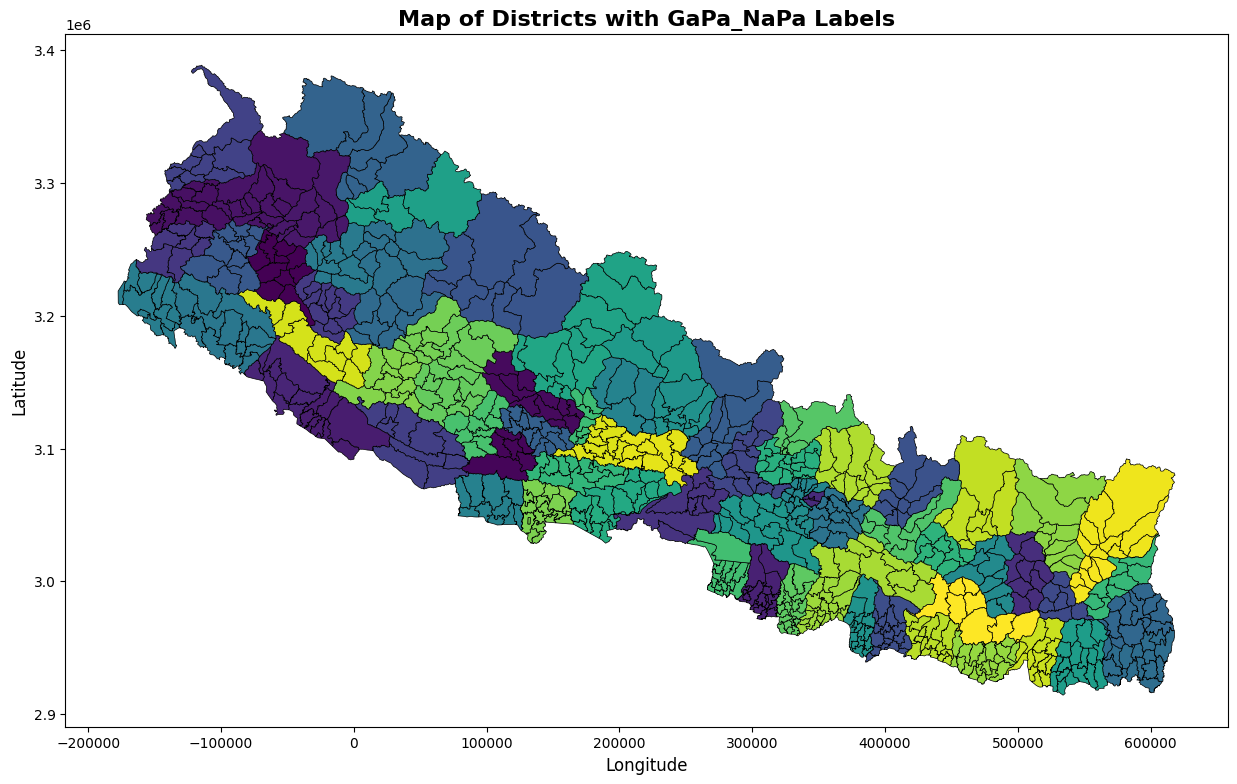

In [44]:
# to CRS
gdf = gdf.to_crs(epsg=32645)

# Plot the map with a custom color scheme
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
gdf.plot(column='DISTRICT', ax=ax, cmap='viridis', edgecolor='black', linewidth=0.5)

# Add title and labels
plt.title('Map of Districts with GaPa_NaPa Labels', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add a legend
legend = ax.get_legend()
if legend:
	legend.set_title('Districts', prop={'size': 12})

# Plotting map
plt.show()

In [50]:
# Load raster data (Temperature and Precipitation)
temperature_2020 = rasterio.open("/content/geotiff_data/nepal_temperature_2020.tif")
temperature_2050 = rasterio.open("/content/geotiff_data/nepal_temperature_2050.tif")
precipitation_2020 = rasterio.open("/content/geotiff_data/nepal_precipitation_2020.tif")
precipitation_2050 = rasterio.open("/content/geotiff_data/nepal_precipitation_2050.tif")

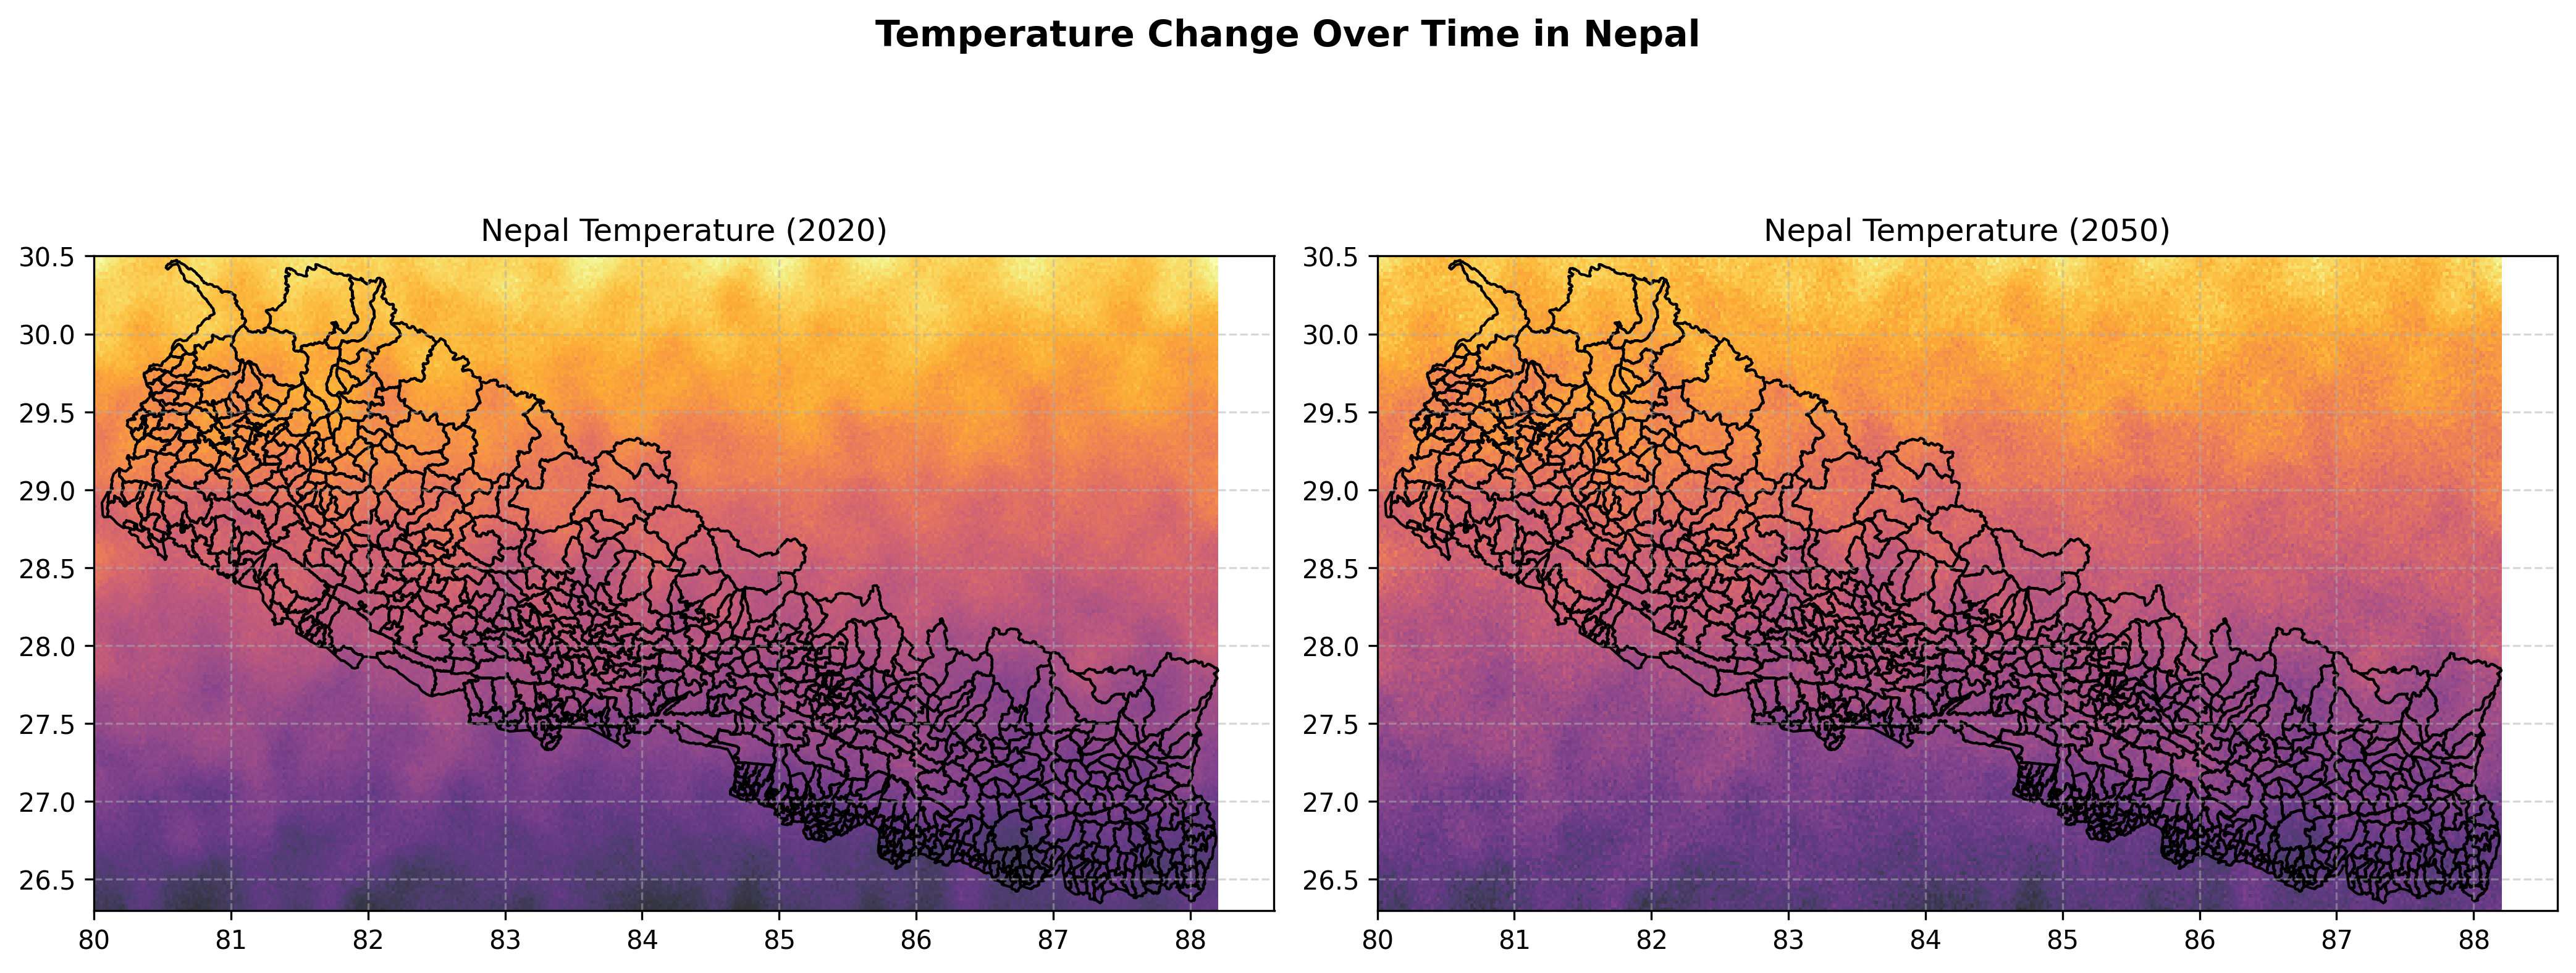

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

for i, (raster, title, ax) in enumerate(zip([temperature_2020, temperature_2050], ["Nepal Temperature (2020)", "Nepal Temperature (2050)"], axes)):
    if raster:
        show(raster, ax=ax, cmap="inferno", alpha=0.8)
        # Read the shapefile using geopandas to create a GeoDataFrame
        shp_data = gpd.read_file(in_goejson)
        if shp_data is not None:
            # Plot the GeoDataFrame using 'plot' method.
            shp_data.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=1)
        ax.set_title(title, fontsize=12)
        ax.grid(True, linestyle="--", alpha=0.5)

plt.suptitle("Temperature Change Over Time in Nepal", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

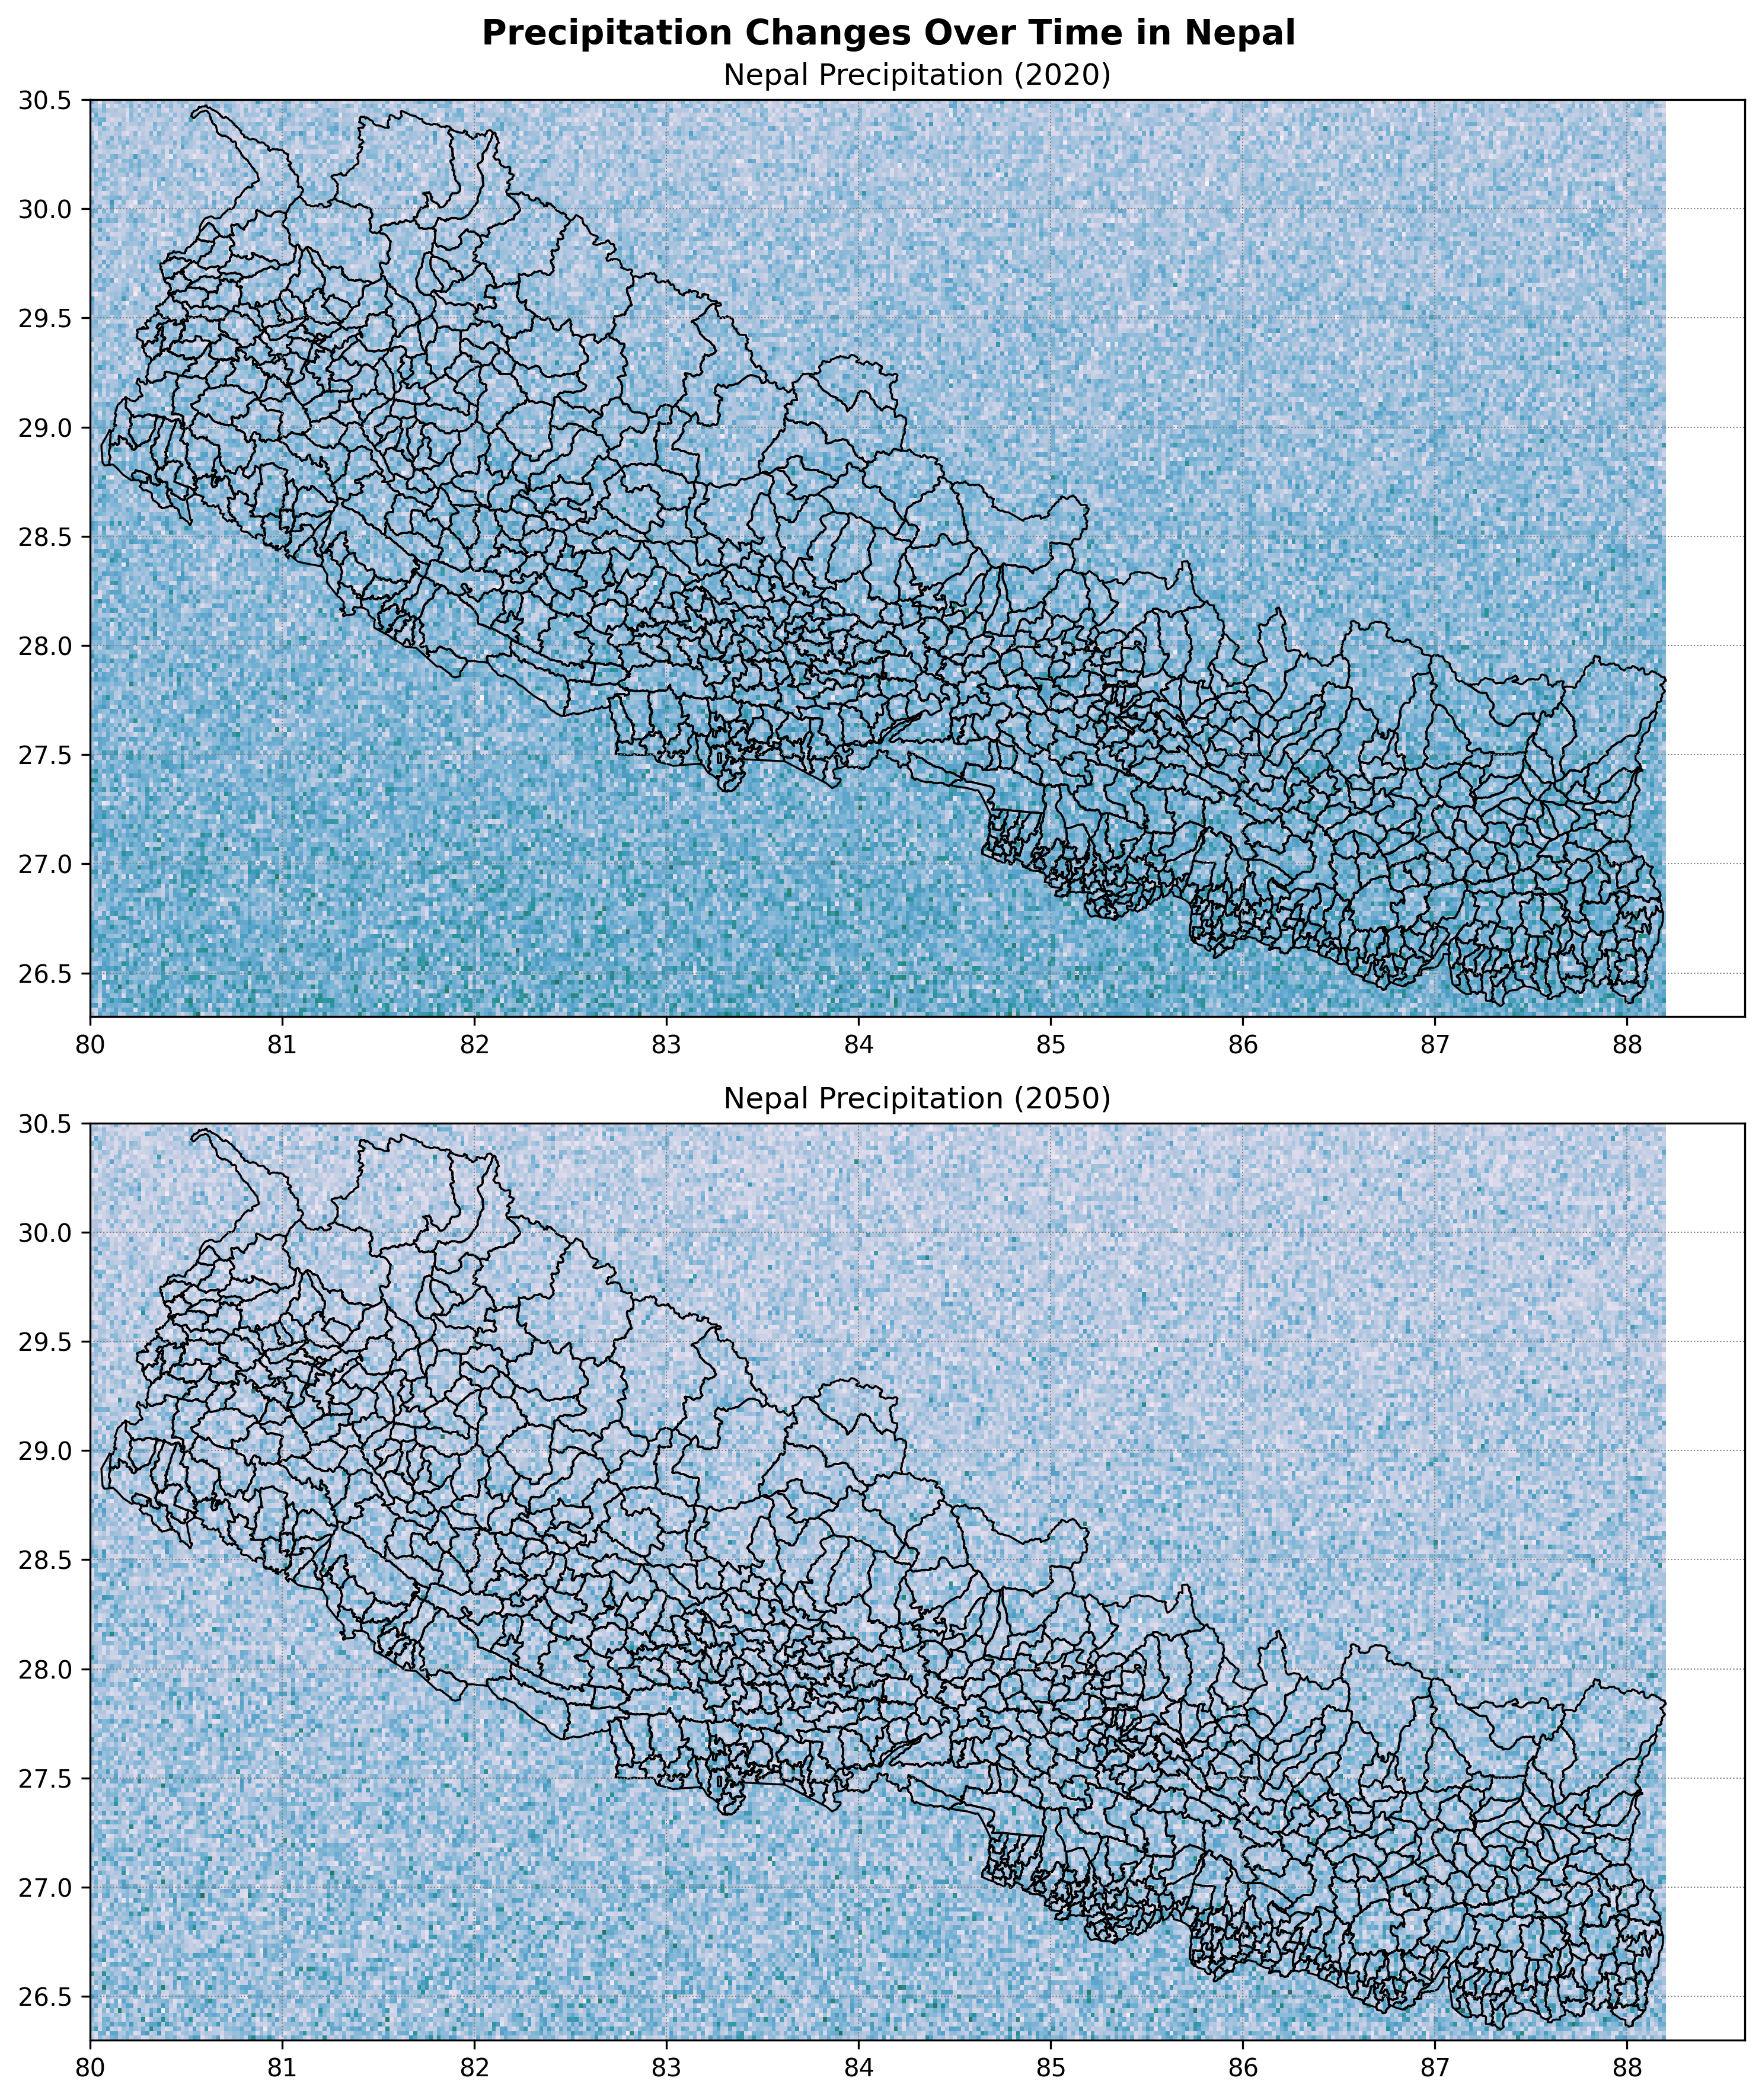

In [57]:
# Precipitation Trend in Nepal

fig, axes = plt.subplots(2, 1, figsize=(10, 12), dpi=300)

for i, (raster, title, ax) in enumerate(zip([precipitation_2020, precipitation_2050],
                                            ["Nepal Precipitation (2020)", "Nepal Precipitation (2050)"],
                                            axes)):
    if raster:
        rasterio.plot.show(raster, ax=ax, cmap="PuBuGn", alpha=0.85)
        if shp_data is not None:
            shp_data.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.8)
        ax.set_title(title, fontsize=12)
        ax.grid(color="gray", linestyle="dotted", linewidth=0.5)

plt.suptitle("Precipitation Changes Over Time in Nepal", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()